## Wisconsin Diagnostic Breast Cancer (WDBC) Dataset

In [147]:
# load modules
import pandas as pd
from src import read
from src import preprocessing
from src import eda
from src import modelling

# reload modules to apply changes
from importlib import reload
reload(read);
reload(preprocessing);
reload(eda);
reload(modelling);

In [2]:
# define data folder path and data file names
raw_data_folder = r"C:\Users\35799\Desktop\cookiecutter-analytical-project\biolizard-internship-marios\data\raw"
datafile_name = r"wdbc.data"

# load data
data_df = read.data_load(folder=raw_data_folder, filename=datafile_name, delimiter=',')

# create column labels
column_labels = ["F"+str(i+1) for i in range(data_df.shape[1]-2)]
column_labels.insert(0, "Diagnosis")
column_labels.insert(0, "ID")
data_df.columns = column_labels


### Data Info

In [3]:
data_df.head()

,ID,Diagnosis,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
id_features, categorical_features, continuous_features = read.data_info(data_df, threshold=20)

DIMENSIONS:
----------------------------------------------------------------------------------------------------
Entries: 568
Features: 32
----------------------------------------------------------------------------------------------------


CATEGORICAL FEATURES:
----------------------------------------------------------------------------------------------------
Features    Data Type    Categories & Counts
----------  -----------  ---------------------
Diagnosis   object       {'B': 357, 'M': 211}
----------------------------------------------------------------------------------------------------


CONTINUOUS FEATURES:
----------------------------------------------------------------------------------------------------
Features    Data Type      Count     Mean      Std      Min     25th    Median      75th       Max
----------  -----------  -------  -------  -------  -------  -------  --------  --------  --------
F1          float64          568   14.12     3.52     6.981   11.698    13

### Data Preprocessing

#### Data Splitting

In [5]:
X, y, X_train, y_train, X_test, y_test, _, _ = preprocessing.data_split(data_df, target="Diagnosis", method="tt", train_proportion=0.8, stratify=True, random_state=0)

#### Missing Values

In [6]:
train_df, test_df = preprocessing.treat_nan(X_train, y_train, X_test, y_test, id_features, categorical_features, continuous_features, target="Diagnosis", drop_nan_rows=False, impute_cutoff=0.5, categorical_imputer="mode", continuous_imputer="median")

#### Automatic Outlier Detection

In [7]:
train_df, test_df = preprocessing.treat_outliers(train_df, test_df, id_features, categorical_features, continuous_features, target="Diagnosis", method="if", outlier_fraction=0.1)

The following entries are probable outliers as identified by the Isolation Forest technique (train set):


,ID,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,Diagnosis
115,864726,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,0.3132,0.9789,3.280,16.940,0.018350,0.067600,0.09263,0.02308,0.023840,0.005601,9.414,17.07,63.34,270.0,0.11790,0.18790,0.15440,0.03846,0.1652,0.07722,B
563,926424,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.700,0.010300,0.028910,0.05198,0.02454,0.011140,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
537,921092,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,0.1870,0.07285,0.3777,1.4620,2.492,19.140,0.012660,0.009692,0.00000,0.00000,0.028820,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.00000,0.00000,0.3058,0.09938,B
351,899987,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.19130,0.1956,0.06121,0.9948,0.8509,7.222,153.100,0.006369,0.042430,0.04266,0.01508,0.023350,0.003385,33.130,23.58,229.30,3234.0,0.15300,0.59370,0.64510,0.27560,0.3690,0.08815,M
350,899667,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,0.5204,1.3240,3.477,51.220,0.009329,0.065590,0.09953,0.02283,0.055430,0.007330,17.360,24.17,119.40,915.3,0.15500,0.50460,0.68720,0.21350,0.4245,0.10500,M
107,86355,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.000,0.006515,0.086680,0.10400,0.02480,0.031120,0.005037,28.400,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789,M
271,8910988,21.750,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,1.1670,1.3520,8.867,156.800,0.005687,0.049600,0.06329,0.01561,0.019240,0.004614,28.190,28.18,195.90,2384.0,0.12720,0.47250,0.58070,0.18410,0.2833,0.08858,M
502,915143,23.090,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,0.1505,0.05484,1.2910,0.7452,9.635,180.200,0.005753,0.033560,0.03976,0.02156,0.022010,0.002897,30.790,23.87,211.50,2782.0,0.11990,0.36250,0.37940,0.22640,0.2908,0.07277,M
317,894329,9.042,18.90,60.07,244.5,0.09968,0.19720,0.19750,0.04908,0.2330,0.08743,0.4653,1.9110,3.769,24.200,0.009845,0.065900,0.10270,0.02527,0.034910,0.007877,10.060,23.40,68.62,297.1,0.12210,0.37480,0.46090,0.11450,0.3135,0.10550,B
2,84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.230,0.009110,0.074580,0.05661,0.01867,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,M


The following entries are probable outliers as identified by the Isolation Forest technique (test set):


,ID,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,Diagnosis
368,9012000,22.010,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,1.0080,0.6999,7.561,130.20,0.003978,0.028210,0.03576,0.01471,0.01518,0.003796,27.660,25.80,195.00,2227.0,0.12940,0.38850,0.4756,0.2432,0.2741,0.08574,M
218,88119002,19.530,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,0.05313,0.7392,1.3210,4.722,109.90,0.005539,0.026440,0.02664,0.01078,0.01332,0.002256,27.900,45.41,180.20,2477.0,0.14080,0.40970,0.3995,0.1625,0.2713,0.07568,M
137,868826,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216,1.2960,1.4520,8.419,101.90,0.010000,0.034800,0.06577,0.02801,0.05168,0.002887,18.550,21.43,121.40,971.4,0.14110,0.21640,0.3355,0.1667,0.3414,0.07147,M
538,921362,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,0.2037,0.07751,0.2196,1.4790,1.445,11.73,0.015470,0.064570,0.09252,0.01364,0.02105,0.007551,8.678,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.0500,0.2790,0.10660,B
378,9013838,11.080,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,0.2114,1.0270,1.719,13.99,0.007405,0.045490,0.04588,0.01339,0.01738,0.004435,13.240,32.82,91.76,508.1,0.21840,0.93790,0.8402,0.2524,0.4154,0.14030,M
504,915276,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,0.2057,0.09575,0.2744,1.3900,1.787,17.67,0.021770,0.048880,0.05189,0.01450,0.02632,0.011480,10.600,18.04,69.47,328.1,0.20060,0.36630,0.2913,0.1075,0.2848,0.13640,B
77,8610862,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.068350,0.10910,0.02593,0.07895,0.005987,23.370,31.72,170.30,1623.0,0.16390,0.61640,0.7681,0.2508,0.5440,0.09964,M
338,89812,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.14100,0.1797,0.05506,1.0090,0.9245,6.462,164.10,0.006292,0.019710,0.03582,0.01301,0.01479,0.003118,30.670,30.73,202.40,2906.0,0.15150,0.26780,0.4819,0.2089,0.2593,0.07738,M
235,88299702,23.210,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.028630,0.04497,0.01716,0.01590,0.003053,31.010,34.51,206.00,2944.0,0.14810,0.41260,0.5820,0.2593,0.3103,0.08677,M
8,84501001,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.01432,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.2210,0.4366,0.20750,M


#### Target Feature Balance

In [8]:
preprocessing.target_balance_check(train_df, target="Diagnosis", imbalance_fraction=0.3, graphic=False)

Target Feature Levels      Counts    Percentages (%)
-----------------------  --------  -----------------
B                             268               65.7
M                             140               34.3


The tagret feature levels are unbalanced.


In [9]:
# sampling techniques to treat target feature imbalance

# oversampling ratios must be greater or equal to 1 and are based on the class with the most counts
oversampling_ratios = {"B": 1, "M": 1}
train_df_oversampled = preprocessing.sampler(train_df, target="Diagnosis", method="over", sampling_ratios=oversampling_ratios, random_state=0, graphic=False)

Balanced target feature (oversampling):
Target Feature Levels      Counts    Percentages (%)
-----------------------  --------  -----------------
B                             268                 50
M                             268                 50


In [10]:
# undersampling ratios must be less or equal to 1 and are based on the class with the least counts
undersampling_ratios = {"B": 1, "M": 1}
train_df_undersampled = preprocessing.sampler(train_df, target="Diagnosis", method="under", sampling_ratios=undersampling_ratios, random_state=0, graphic=False)

Balanced target feature (undersampling):
Target Feature Levels      Counts    Percentages (%)
-----------------------  --------  -----------------
B                             140                 50
M                             140                 50


### Data Exploration

In [11]:
# data sample for examples
sample_df = train_df.iloc[:, 1:11]
sample_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
380,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.020740,0.2003,0.06246
143,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688
135,11.71,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.026000,0.1339,0.05945
34,16.74,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.060180,0.1896,0.05656
403,12.34,14.95,78.29,469.1,0.08682,0.04571,0.02109,0.020540,0.1571,0.05708


#### Correlation Matrix & Heatmap

In [12]:
# correlation matrix
pearson_correlation_matrix = eda.correlations(sample_df, type="pearson", printout="matrix")

Pearson Correlation Matrix:


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
F1,1.000,0.275,0.998,0.993,0.116,0.506,0.691,0.801,0.133,-0.386
F2,0.275,1.000,0.280,0.276,-0.013,0.204,0.284,0.250,0.074,-0.094
F3,0.998,0.280,1.000,0.991,0.153,0.555,0.729,0.829,0.161,-0.342
F4,0.993,0.276,0.991,1.000,0.119,0.494,0.691,0.803,0.139,-0.373
F5,0.116,-0.013,0.153,0.119,1.000,0.663,0.511,0.535,0.517,0.603
F6,0.506,0.204,0.555,0.494,0.663,1.000,0.889,0.834,0.518,0.470
F7,0.691,0.284,0.729,0.691,0.511,0.889,1.000,0.940,0.424,0.210
F8,0.801,0.250,0.829,0.803,0.535,0.834,0.940,1.000,0.423,0.088
F9,0.133,0.074,0.161,0.139,0.517,0.518,0.424,0.423,1.000,0.357
F10,-0.386,-0.094,-0.342,-0.373,0.603,0.470,0.210,0.088,0.357,1.000


In [13]:
# correlation heatmap
spearman_correlation_matrix = eda.correlations(sample_df, type="spearman", printout="heatmap")

#### Boxplots

In [14]:
eda.box_plot(train_df, features=continuous_features, stratify_var="Diagnosis", group_var="", title="Boxplot of ", xtitle="Diagnosis", ytitle="Feature value", widget_description="Select: ", stratify=True, group=False)

In [15]:
eda.box_subplots(train_df, features=list(sample_df.columns), stratify_var="Diagnosis", columns=5, width=250, height=250, stratify=True)

#### Histograms

In [16]:
eda.hist_plot(train_df, features=list(sample_df.columns), group_var="Diagnosis", title="Histogram of ", xtitle="Bins", ytitle="Count", widget_description="Select: ", group=True)

In [17]:
eda.hist_subplots(sample_df, columns=5, width=250, height=250)

#### Distribution plots

In [18]:
eda.dist_plot(sample_df.iloc[:, 0:1], title="Distribution Plot:")

In [19]:
eda.dist_subplots(sample_df, columns=5, width=250, height=250)

#### Dimensionality Reduction

##### PCA

In [20]:
# Principal Component Analysis
eda.pca_variance_plot(train_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Diagnosis")

In [21]:
encoded_train_df, pca2d_train_df, encoded_test_df, pca2d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Diagnosis", method="pca", plot_type="2d", components=2)

In [22]:
_, pca3d_train_df, _, pca3d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Diagnosis", method="pca", plot_type="3d", components=3)

In [23]:
_, pca5d_train_df, _, pca5d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Diagnosis", method="pca", plot_type="multi", components=5)

##### MDS

In [24]:
# _, mds2d_train_df, _, mds2d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Diagnosis", method="mds", plot_type="2d", components=2)

In [25]:
# _, mds3d_train_df, _, mds3d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Diagnosis", method="mds", plot_type="3d", components=3)

In [26]:
# _, mds5d_train_df, _, mds5d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Diagnosis", method="mds", plot_type="multi", components=5)

##### t-SNE

In [27]:
# _, tsne2d_train_df, _, tsne2d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Diagnosis", method="tsne", plot_type="2d", components=2, perplexity=30)

In [28]:
# _, tsne3d_train_df, _, tsne3d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Diagnosis", method="tsne", plot_type="3d", components=3, perplexity=30)

##### UMAP

In [29]:
# _, umpa2d_train_df, _, umpa2d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Diagnosis", method="umap", plot_type="2d", components=2, neighbors=100, min_distance=0.1, metric="euclidean")

In [30]:
# _, umpa3d_train_df, _, umpa3d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Diagnosis", method="umap", plot_type="3d", components=3, neighbors=100, min_distance=0.1, metric="euclidean")

In [31]:
# _, umpa5d_train_df, _, umpa5d_test_df = eda.dimensionality_reduction(train_df, test_df, identifier=id_features, categorical=categorical_features, continuous=continuous_features, target="Diagnosis", method="umap", plot_type="multi", components=5, neighbors=100, min_distance=0.1, metric="euclidean")

#### Cluster Analysis

In [32]:
pca2d_train_df.head()

,ID,PC1,PC2,Diagnosis
0,901836,-3.372203,0.278787,B
1,869254,-4.440443,-0.899814,B
2,868223,-2.273530,-0.103324,B
3,854253,4.115515,-0.259381,M
4,904969,-3.670267,-1.436996,B


##### K-Means

In [33]:
# eda.kmeans_inertia_plot(pca2d_train_df, identifier=id_features, target="Diagnosis")

In [34]:
kmeans2d_train_df = eda.clustering(df=train_df, input_df=pca2d_train_df, identifier=id_features, target="Diagnosis", method="kmeans", plot_type="2d", marker_size_ref="F1", clusters=2, initializations=100, random_state=0)

In [35]:
kmeans3d_train_df = eda.clustering(df=train_df, input_df=pca3d_train_df, identifier=id_features, target="Diagnosis", method="kmeans", plot_type="3d", marker_size_ref="F1", clusters=2, initializations=100, random_state=0)

##### Hierarchical

In [36]:
# hierarchical2d_train_df = eda.clustering(df=train_df, input_df=pca2d_train_df, identifier=id_features, target="Diagnosis", method="hierarchical", plot_type="2d", marker_size_ref="F1", clusters=2)

In [37]:
# hierarchical3d_train_df = eda.clustering(df=train_df, input_df=pca3d_train_df, identifier=id_features, target="Diagnosis", method="hierarchical", plot_type="3d", marker_size_ref="F1", clusters=2)

##### DBSCAN

In [38]:
# dbscan2d_train_df = eda.clustering(df=train_df, input_df=pca2d_train_df, identifier=id_features, target="Diagnosis", method="dbscan", plot_type="2d", marker_size_ref="F1", epsilon=1, minimum_samples=10, algorithm="auto")

In [39]:
# dbscan3d_train_df = eda.clustering(df=train_df, input_df=pca3d_train_df, identifier=id_features, target="Diagnosis", method="dbscan", plot_type="3d", marker_size_ref="F1", epsilon=1, minimum_samples=15, algorithm="auto")

### Data Modelling

#### Feature Selection

##### Recursive Feature Ellimination

In [40]:
# works with estimators "Tree", "Logistic", "linearSVC", "Forest" and "AdaBoost"
# "SVC", "Bagging" and "KNN" estimators do not work
rfe_df = modelling.feature_selection(train_df, identifier=id_features, target="Diagnosis", method="RFE", estimator="Tree", selected_features_number=None)

Initial dataset dimensions:
Rows: 408
Columns: 32


Dataset dimensions after feature selection:
Rows: 408
Columns: 17


##### Boruta

In [41]:
# works only with estimator "Forest"
boruta_df = modelling.feature_selection(train_df, identifier=id_features, target="Diagnosis", method="Boruta", estimator="Forest", random_state=0)

Initial dataset dimensions:
Rows: 408
Columns: 32


Dataset dimensions after feature selection:
Rows: 408
Columns: 25


##### L1-based selection

In [42]:
# works only with estimators "Logistic" and "linearSVC"
l1_df = modelling.feature_selection(train_df, identifier=id_features, target="Diagnosis", method="L1", estimator="linearSVC")

Initial dataset dimensions:
Rows: 408
Columns: 32


Dataset dimensions after feature selection:
Rows: 408
Columns: 16


#### Model Fitting


Baseline Performance of Classifiers:
+----+--------------------+------+------+------+------+------------+----------+-------------+-------+
|    | Algorithm          |   TN |   FN |   FP |   TP |   Accuracy |   Recall |   Precision |    F1 |
|----+--------------------+------+------+------+------+------------+----------+-------------+-------|
|  0 | LogisticRegression |   68 |    1 |    4 |   29 |      0.951 |    0.879 |       0.967 | 0.921 |
|  1 | SVM                |   68 |    1 |    6 |   27 |      0.931 |    0.818 |       0.964 | 0.885 |
|  2 | LinearSVM          |   69 |    0 |   12 |   21 |      0.882 |    0.636 |       1     | 0.778 |
|  3 | SGD                |   13 |   56 |    0 |   33 |      0.451 |    1     |       0.371 | 0.541 |
|  4 | K-NearestNeigbors  |   67 |    2 |    5 |   28 |      0.931 |    0.848 |       0.933 | 0.889 |
|  5 | GaussianNB         |   62 |    7 |    2 |   31 |      0.912 |    0.939 |       0.816 | 0.873 |
|  6 | DecisionTree       |   68 |    1 |   

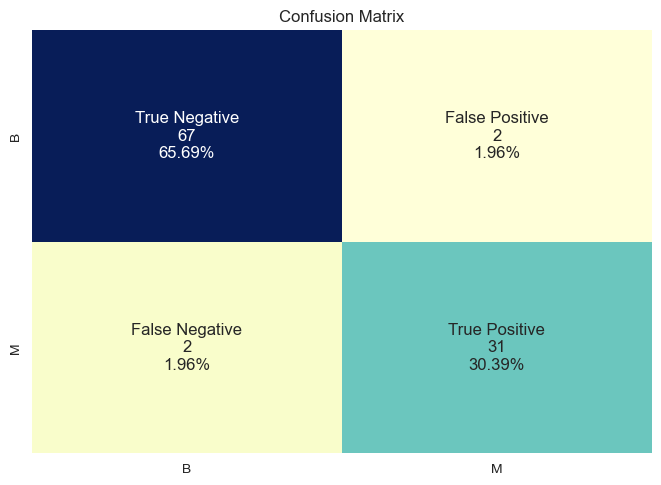

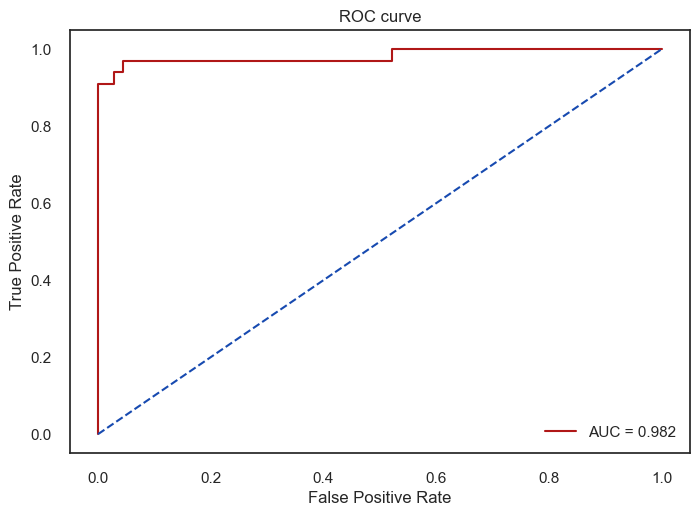

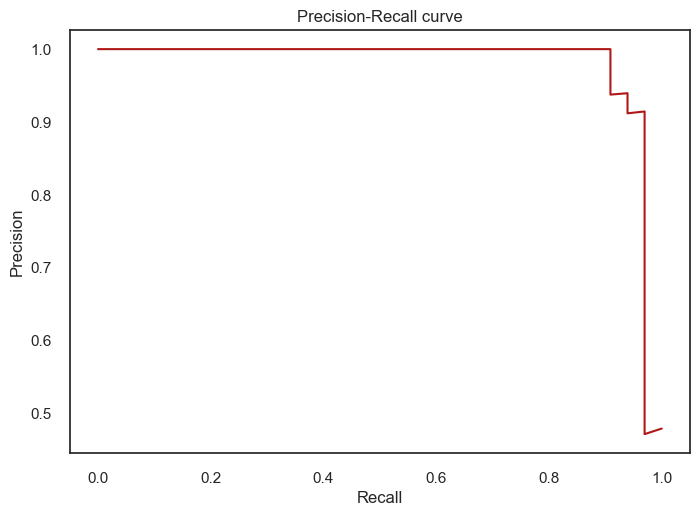

In [43]:
classifier = modelling.binary_classification(rfe_df, test_df, identifier=id_features, target='Diagnosis', k_fold=2, metric='accuracy', save_cv_results=False)

##### Auto-ML (TPOT)

In [251]:
reload(modelling);

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


1.00 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: MLPClassifier(MaxAbsScaler(input_matrix), alpha=0.0001, learning_rate_init=0.1)


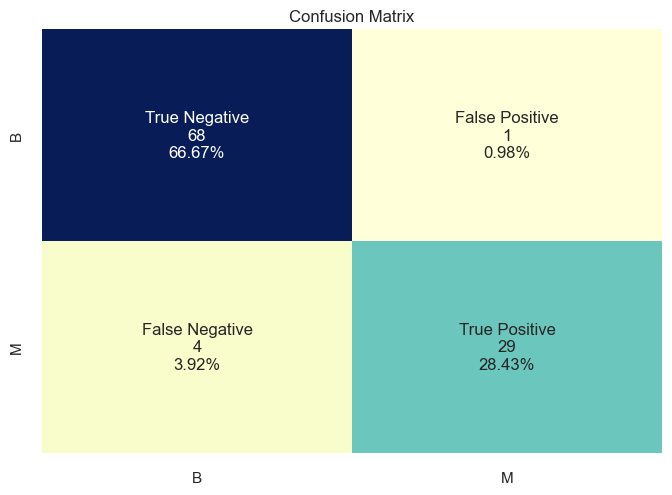

In [252]:
modelling.tpot_classification(rfe_df, test_df, identifier=id_features, target='Diagnosis', generations=None, population_size=100, max_time_mins=1)

#### Feature Importance

+----+------------------+----------------------+
|    | Top 5 Features   |   Feature Importance |
|----+------------------+----------------------|
|  0 | F24              |                0.197 |
|  1 | F22              |                0.165 |
|  2 | F8               |                0.157 |
|  3 | F27              |                0.107 |
|  4 | F25              |                0.101 |
+----+------------------+----------------------+


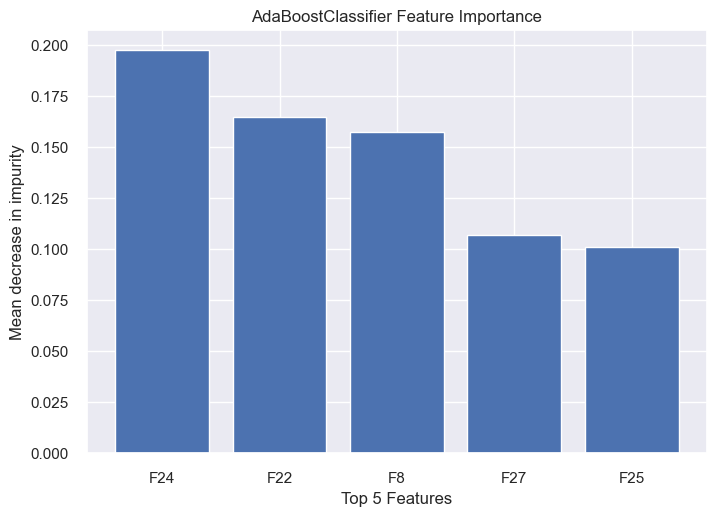

In [44]:
modelling.feature_importance(rfe_df, test_df, identifier=id_features, target='Diagnosis', classifier=classifier, top_features_to_view=5, use_boruta_shap=False)

#### SHAP (SHapley Additive exPlanations)

Permutation explainer: 103it [00:13,  2.37it/s]                         


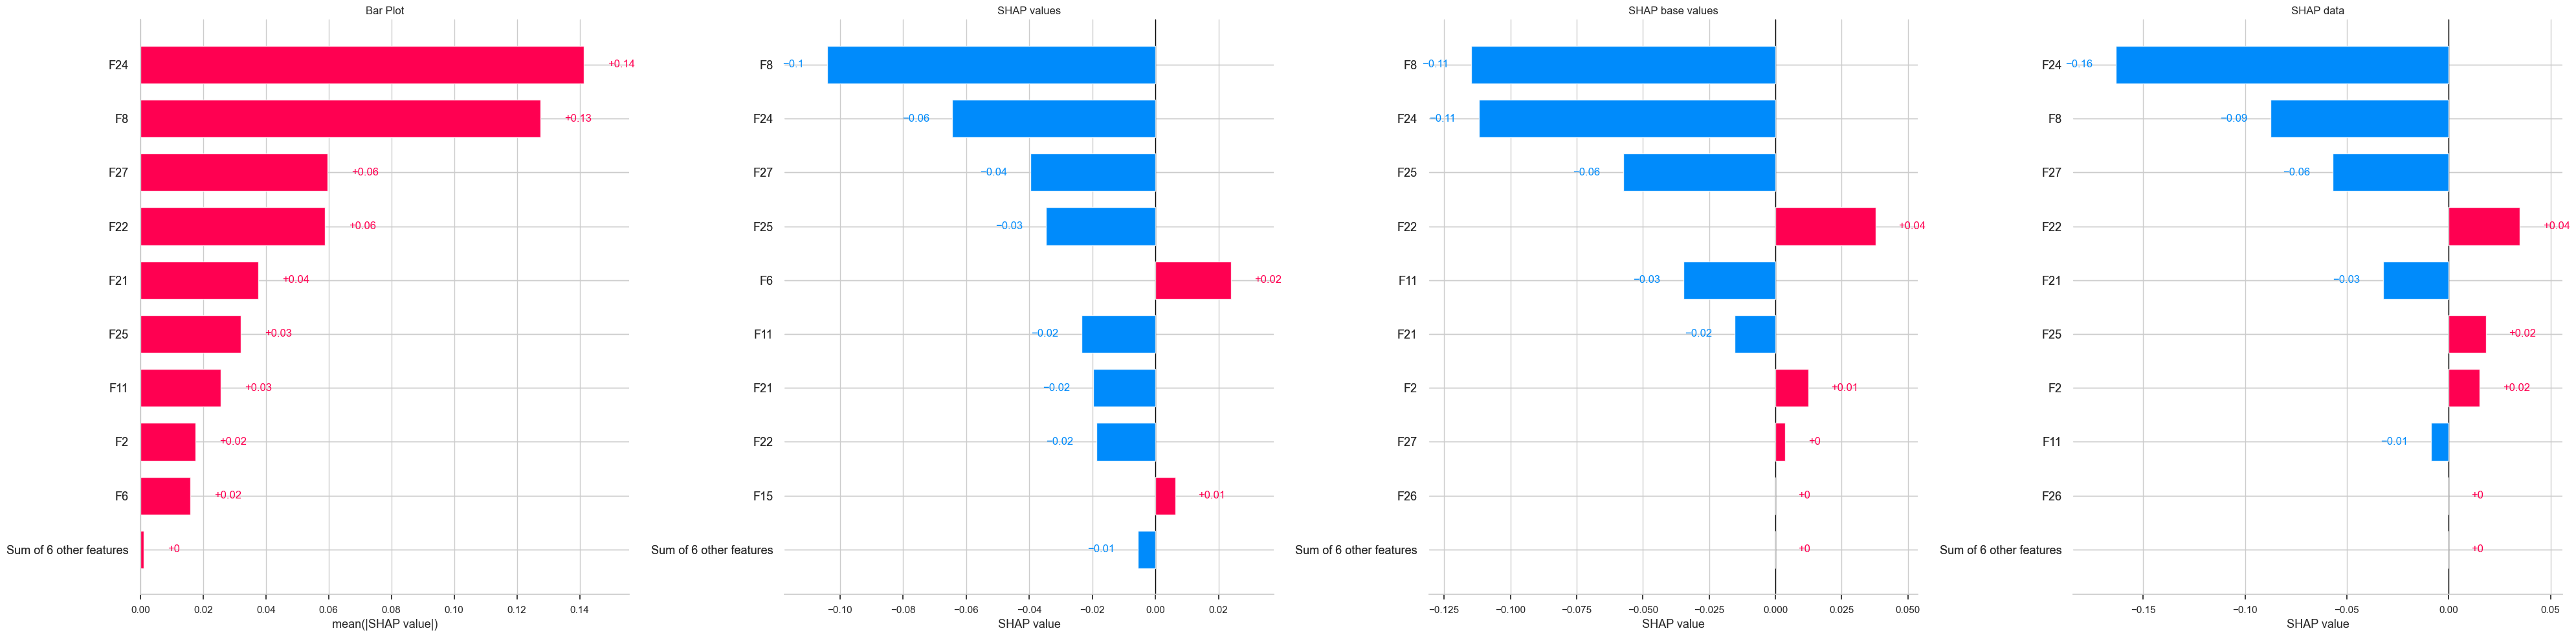

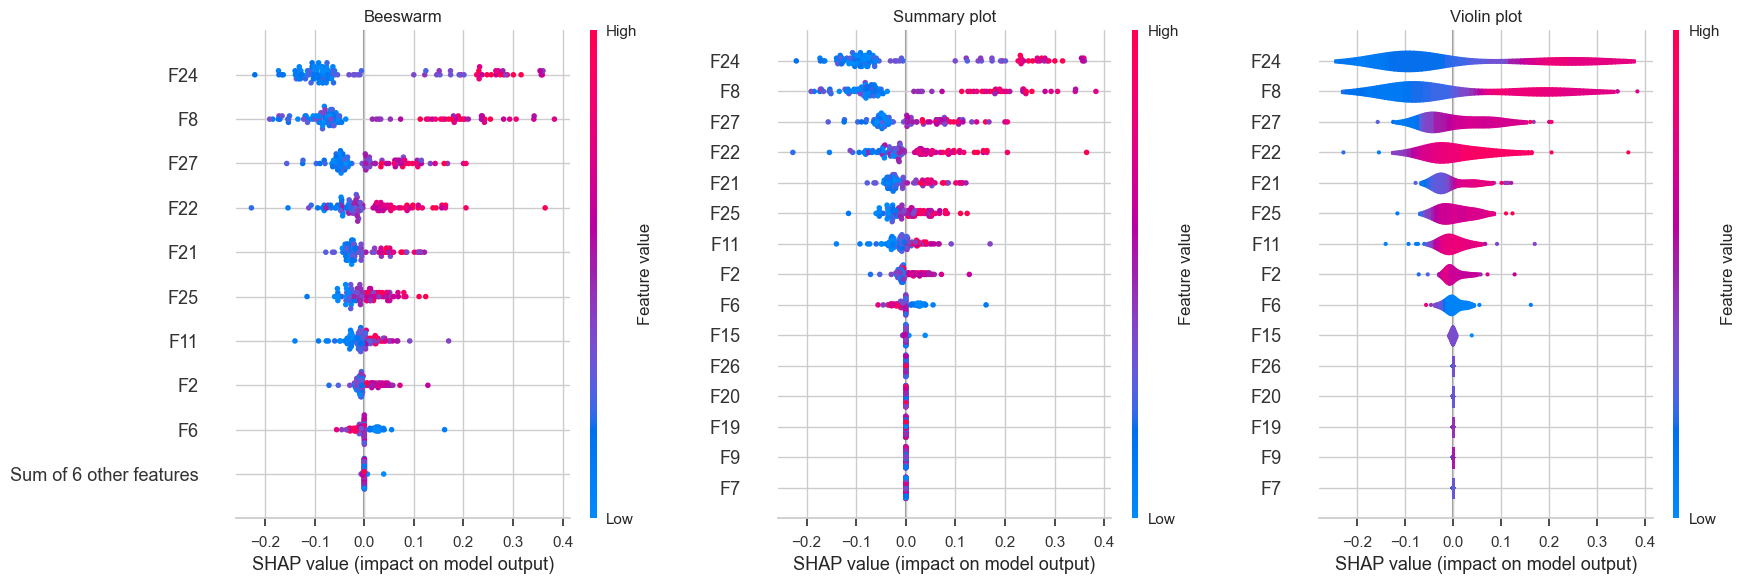

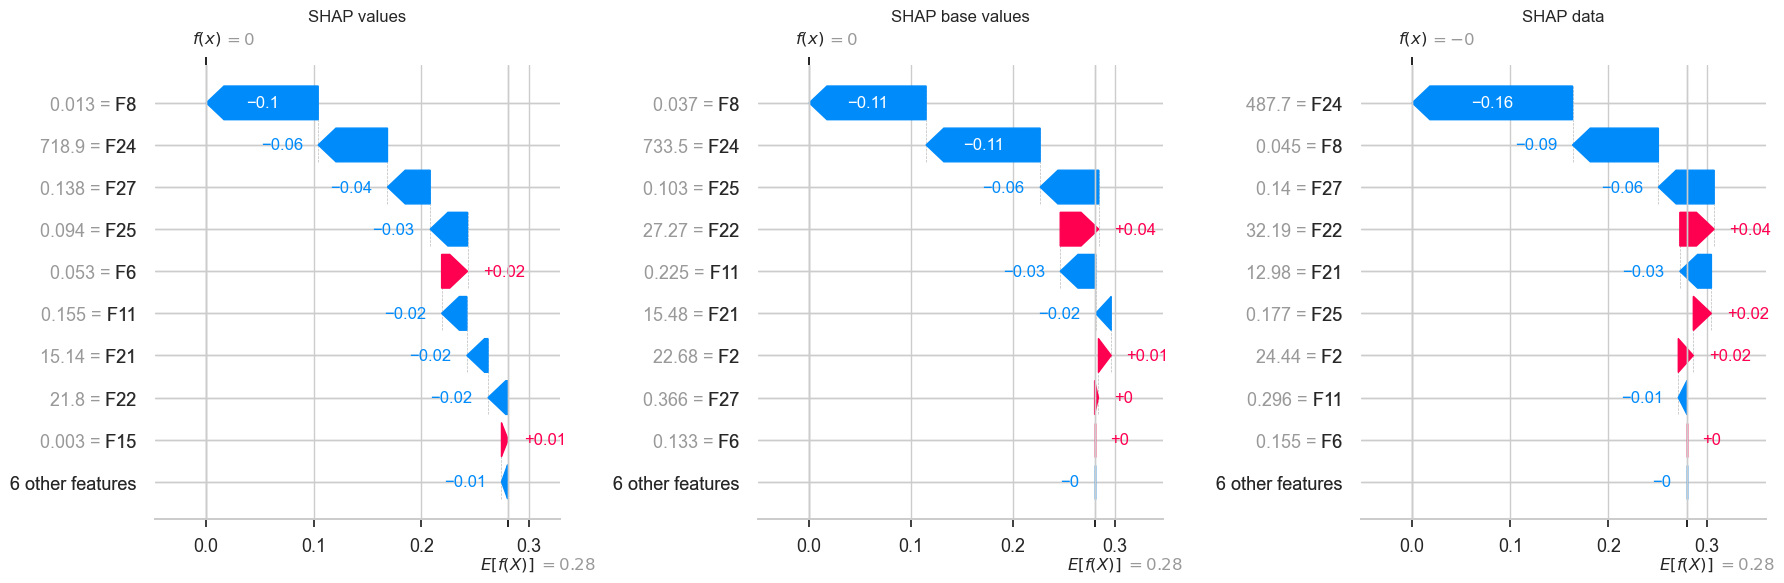

In [45]:
modelling.shap_value_analysis(rfe_df, test_df, identifier=id_features, target='Diagnosis', classifier=classifier)

#### Event Chart

In [46]:
modelling.event_chart(rfe_df, test_df, identifier=id_features, target='Diagnosis', classifier=classifier)